# Centroid-UNet for Agriculture Plot Dataset

<br><br>

In [1]:
'''importing libraries'''

import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv1D, Concatenate, Conv2DTranspose, GaussianNoise, Lambda, Dropout, Flatten, Dense, Reshape, TimeDistributed, Permute, Softmax, Multiply, BatchNormalization, UpSampling2D
from keras import backend as K
import tensorflow as tf
from keras.models import model_from_json

import glob
from random import shuffle, randint
import numpy as np
from matplotlib import pyplot as plt
import imageio
import json

import DataUtils
import Model

Using TensorFlow backend.


### 1) Reading Data

In [2]:
'''setting image size'''

'''in_h and in_w must be should be divisible by 2^4, making them suitable for 4 max pooling operations'''
'''and input images will be passed with 0 in to shape of (in_h,in_w)'''

in_h = 1280 # model input height
in_w = 1280 # model input width

im_h = 1280 # input image height 
im_w = 1280 # input image width

In [3]:
'''reading training data'''

imList = glob.glob("./data/AgriPlot/train/*.png")

x_train = np.zeros((len(imList), in_h, in_w, 3)).astype('float32')
y_train = np.zeros((len(imList), in_h, in_w, 1)).astype('float32')

for i1 in range(len(imList)):
    x_train[i1,:im_h,:im_w,:] = imageio.imread(imList[i1])[:,:,0:3]
    
    with open(imList[i1].replace('train', 'train_labels').replace('png', 'json')) as f:
        ctr_list = json.load(f)['centroids']
        ctr_img = DataUtils.centroids2Images(ctr_list, im_num_row=in_h, im_num_col=in_w, g_radius=20)
        y_train[i1,:,:,0] = ctr_img
        
print(x_train.shape)
print(y_train.shape)

(471, 1280, 1280, 3)
(471, 1280, 1280, 1)


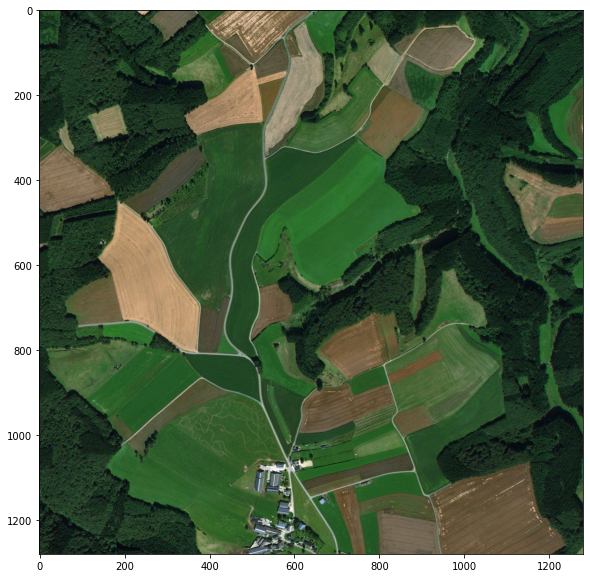

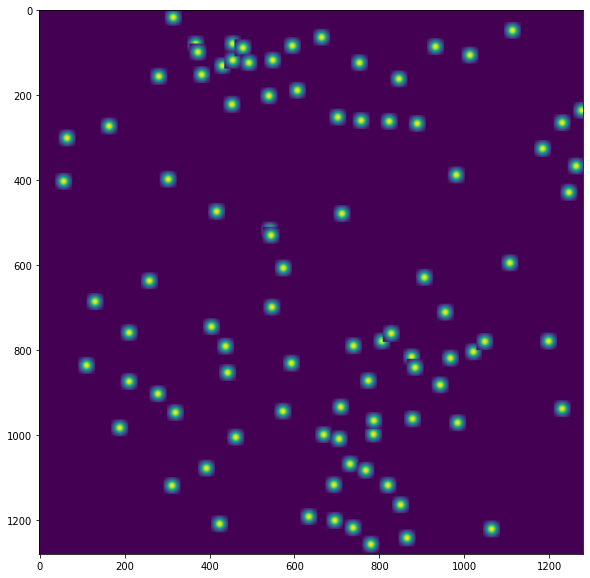

In [4]:
'''visualizing random input/output training images'''

rdm_idx = randint(0, len(imList))

plt.figure(figsize=(10, 10))
plt.imshow(x_train[rdm_idx,:,:,:].astype('uint8'))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(y_train[rdm_idx,:,:,0])
plt.show()

In [5]:
'''reading val data'''

imList = glob.glob("./data/AgriPlot/val/*.png")

x_val = np.zeros((len(imList), in_h, in_w, 3)).astype('float32')
y_val = np.zeros((len(imList), in_h, in_w, 1)).astype('float32')

for i1 in range(len(imList)):
    x_val[i1,:im_h,:im_w,:] = imageio.imread(imList[i1])[:,:,0:3]
    
    with open(imList[i1].replace('val', 'val_labels').replace('png', 'json')) as f:
        ctr_list = json.load(f)['centroids']
        ctr_img = DataUtils.centroids2Images(ctr_list, im_num_row=in_h, im_num_col=in_w, g_radius=20)
        y_val[i1,:,:,0] = ctr_img
        
print(x_val.shape)
print(y_val.shape)

(94, 1280, 1280, 3)
(94, 1280, 1280, 1)


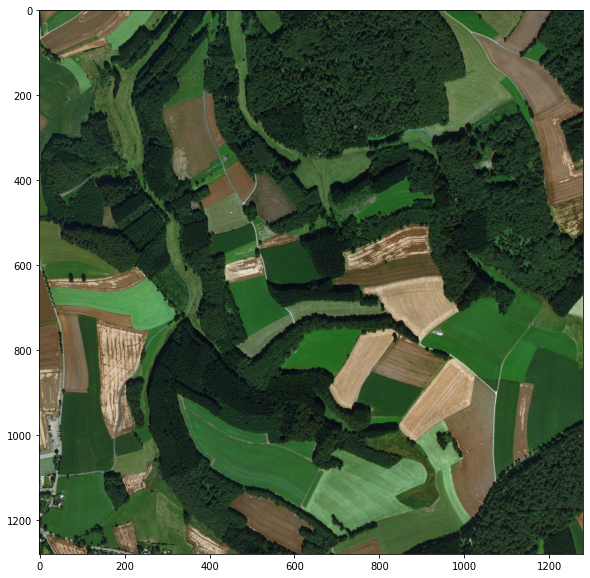

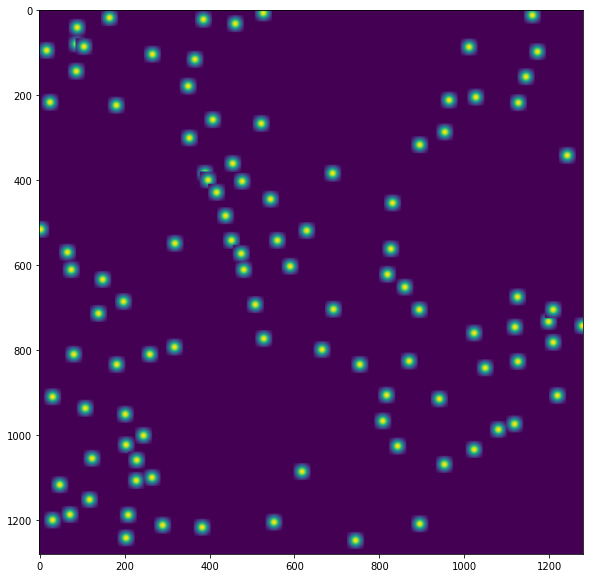

In [6]:
'''visualizing random input/output val images'''

rdm_idx = randint(0, len(imList))

plt.figure(figsize=(10, 10))
plt.imshow(x_train[rdm_idx,:,:,:].astype('uint8'))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(y_train[rdm_idx,:,:,0])
plt.show()

### 2) Model Development and Training

In [8]:
'''building U-Net model'''

model = Model.getModel(input_shape=(in_h,in_w,3))

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1280, 1280, 3 0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 1280, 1280, 3 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_21 (BatchNo (None, 1280, 1280, 3 128         conv2d_22[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 1280, 1280, 3 9248        batch_normalization_21[0][0]     
____________________________________________________________________________________________

In [9]:
'''fitting the model'''

batch_size = 1
epochs = 100

fit_h = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, shuffle=1, validation_data=(x_val, y_val))


Train on 471 samples, validate on 94 samples
Epoch 1/100
471/471 [==============================] - 378s 803ms/step - loss: 0.0465 - val_loss: 0.0130
Epoch 2/100
471/471 [==============================] - 248s 527ms/step - loss: 0.0152 - val_loss: 0.0129
Epoch 3/100
471/471 [==============================] - 246s 523ms/step - loss: 0.0147 - val_loss: 0.0122
Epoch 4/100
471/471 [==============================] - 231s 490ms/step - loss: 0.0144 - val_loss: 0.0134
Epoch 5/100
471/471 [==============================] - 240s 510ms/step - loss: 0.0143 - val_loss: 0.0119
Epoch 6/100
471/471 [==============================] - 234s 496ms/step - loss: 0.0138 - val_loss: 0.0119
Epoch 7/100
471/471 [==============================] - 238s 505ms/step - loss: 0.0134 - val_loss: 0.0111
Epoch 8/100
471/471 [==============================] - 226s 480ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 9/100
471/471 [==============================] - 221s 470ms/step - loss: 0.0128 - val_loss: 0.0109
Epoch 10/

471/471 [==============================] - 224s 475ms/step - loss: 0.0075 - val_loss: 0.0106
Epoch 77/100
471/471 [==============================] - 221s 469ms/step - loss: 0.0074 - val_loss: 0.0105
Epoch 78/100
471/471 [==============================] - 222s 471ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 79/100
471/471 [==============================] - 221s 470ms/step - loss: 0.0073 - val_loss: 0.0107
Epoch 80/100
471/471 [==============================] - 222s 471ms/step - loss: 0.0073 - val_loss: 0.0109
Epoch 81/100
471/471 [==============================] - 222s 471ms/step - loss: 0.0073 - val_loss: 0.0107
Epoch 82/100
471/471 [==============================] - 223s 473ms/step - loss: 0.0072 - val_loss: 0.0107
Epoch 83/100
471/471 [==============================] - 221s 470ms/step - loss: 0.0072 - val_loss: 0.0108
Epoch 84/100
471/471 [==============================] - 221s 469ms/step - loss: 0.0072 - val_loss: 0.0106
Epoch 85/100
471/471 [==============================] - 221

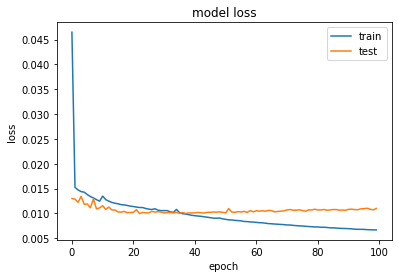

In [17]:
'''plotting loss curves'''

plt.plot(fit_h.history['loss'])
plt.plot(fit_h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
'''saving the model'''

model_json = model.to_json()
with open("./models/AgriPlot.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("./models/AgriPlot.h5")

np.savetxt('./models/AgriPlot_loss.txt', fit_h.history['loss'], fmt='%.8f')
np.savetxt('./models/AgriPlot_loss_val.txt', fit_h.history['val_loss'], fmt='%.8f')

### 3) Inference

In [12]:
'''reading test data'''

imList = glob.glob("./data/AgriPlot/test/*.png")

x_test = np.zeros((len(imList), in_h, in_w, 3)).astype('float32')
y_test = np.zeros((len(imList), in_h, in_w, 1)).astype('float32')

for i1 in range(len(imList)):
    x_test[i1,:im_h,:im_w,:] = imageio.imread(imList[i1])[:,:,0:3]
    
    with open(imList[i1].replace('test', 'test_labels').replace('png', 'json')) as f:
        ctr_list = json.load(f)['centroids']
        ctr_img = DataUtils.centroids2Images(ctr_list, im_num_row=in_h, im_num_col=in_w, g_radius=20)
        y_test[i1,:,:,0] = ctr_img
        
print(x_test.shape)
print(y_test.shape)

(99, 1280, 1280, 3)
(99, 1280, 1280, 1)


In [13]:
'''loading model'''

# this is centroid estimation CNN model from Notebook I
json_file = open('./models/AgriPlot.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model_infr = model_from_json(loaded_model_json)
model_infr.load_weights("./models/AgriPlot.h5")

In [14]:
'''inference'''

p_test = model_infr.predict(x_test, batch_size = 1)
print(p_test.shape)

(99, 1280, 1280, 1)


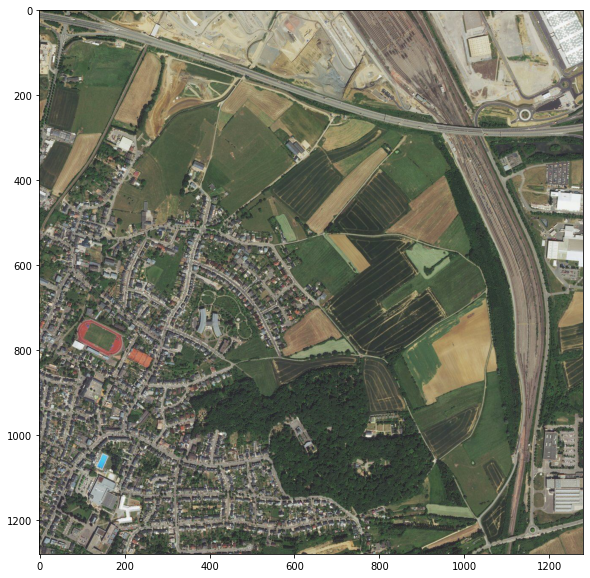

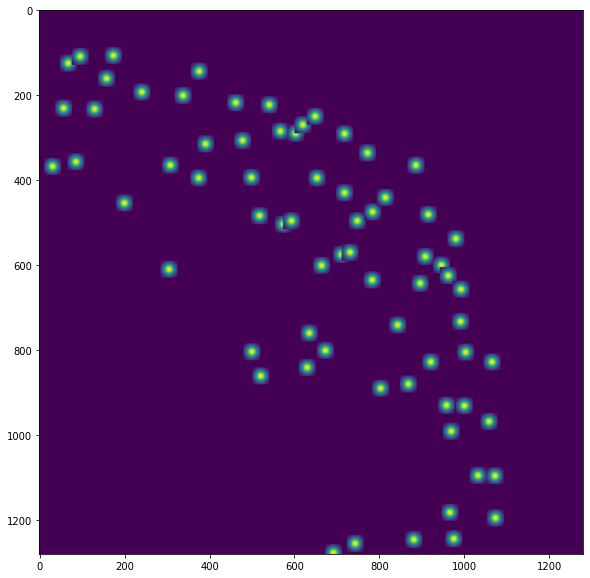

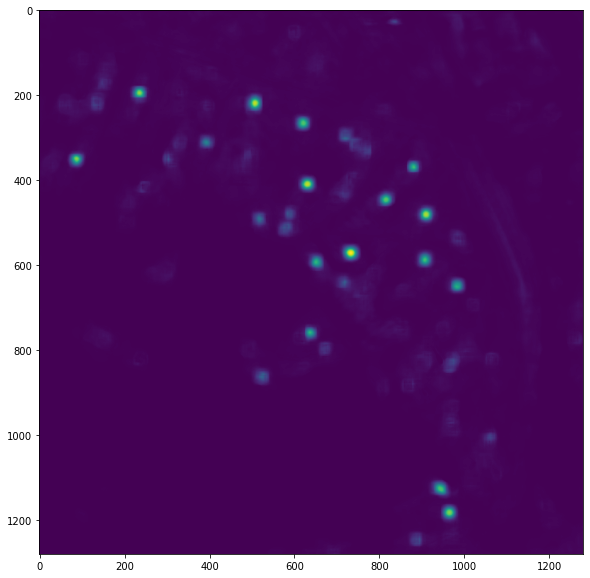

In [15]:
'''visualizing random input/output/prediction images'''

rdm_idx = randint(0, len(imList))

plt.figure(figsize=(10, 10))
plt.imshow(x_test[rdm_idx,:,:,:].astype('uint8'))
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(y_test[rdm_idx,:,:,0])
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(p_test[rdm_idx,:,:,0])
plt.show()